/tmp/ipykernel_4096883/705791383.py:74: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


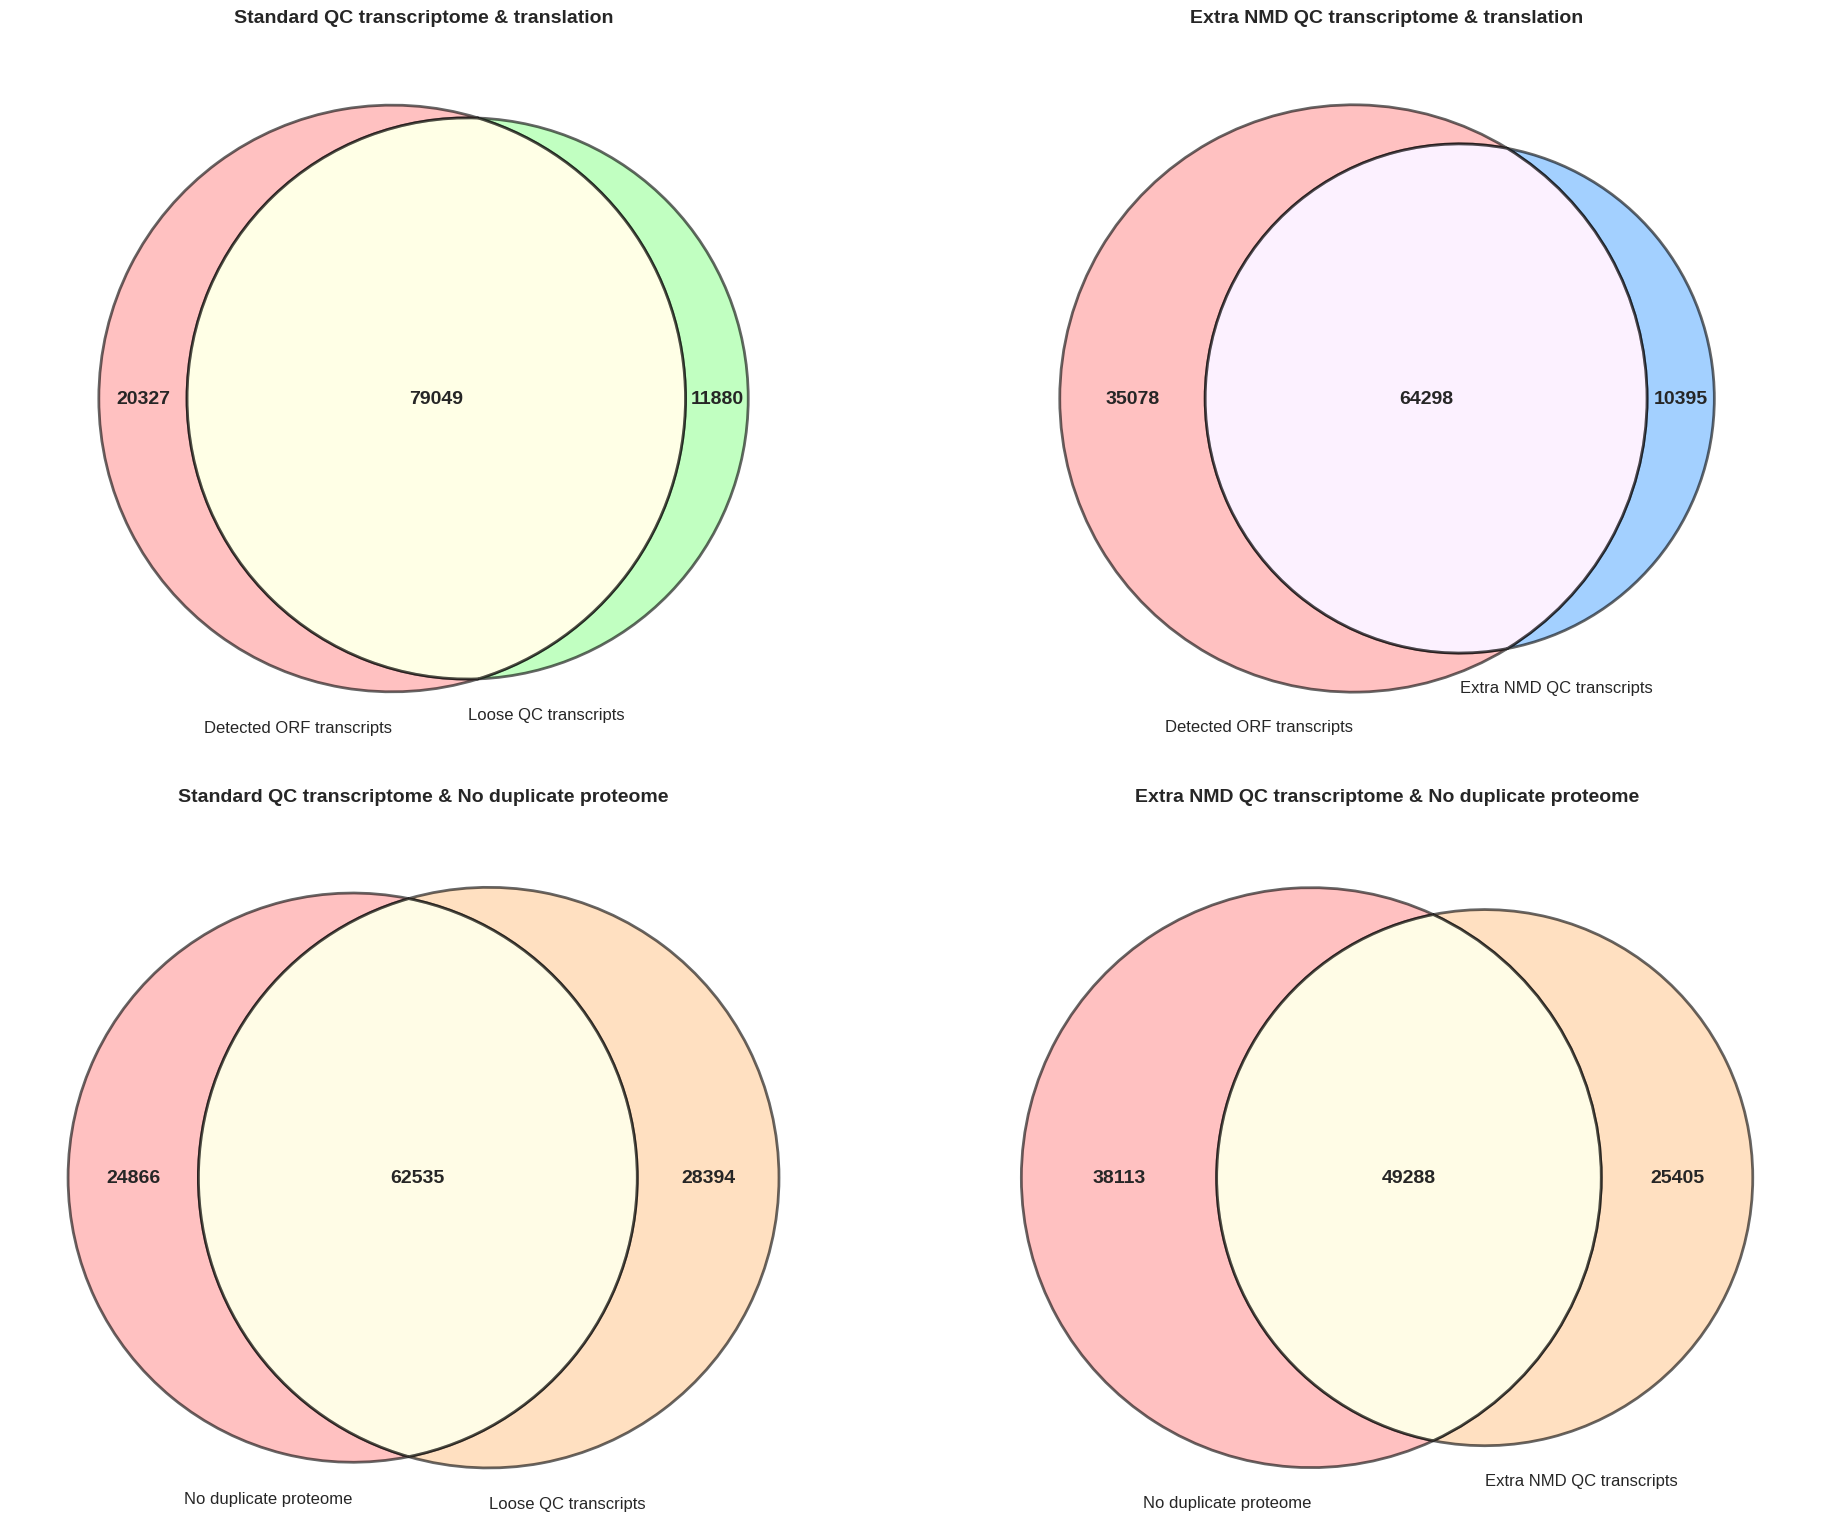

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.colors as mcolors

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from file and return as set"""
    if file_path.endswith('.fasta'):
        # Handle FASTA file
        ids = set()
        with open(file_path, 'r') as f:
            for line in f:
                if line.startswith('>'):
                    # Split by tab and take first element
                    id_ = line.strip()[1:].split('\t')[0]
                    ids.add(id_)
        return ids
    
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_custom_venn(set1, set2, labels, ax, colors=None):
    """Create a customized Venn diagram"""
    if colors is None:
        colors = ['#FF9999', '#66B2FF']
    
    # Calculate set differences and intersection
    only_1 = set1 - set2
    only_2 = set2 - set1
    intersection = set1 & set2
    
    # Create Venn diagram with custom colors and properties
    venn = venn2(subsets=(len(only_1), len(only_2), len(intersection)),
                 set_labels=labels,
                 ax=ax,
                 set_colors=(colors[0], colors[1]),
                 alpha=0.6)
    
    # Customize the appearance
    for patch in venn.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(2.0)
    
    # Customize text appearance
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(12)
    
    # Make the numbers larger
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)
            text.set_fontweight('bold')

def main():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"
    file3_path = "04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    file3_ids = read_file_ids(file3_path)
    
    # Create figure with custom style
    plt.style.use('seaborn')
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.patch.set_facecolor('white')
    
    # Custom colors for diagrams
    colors_1 = ['#FF9999', '#99FF99']  # Soft red and soft green
    colors_2 = ['#FF9999', '#66B2FF']  # Soft red and soft blue
    colors_3 = ['#FF9999', '#FFCC99']  # Soft red and soft orange
    
    # Create all Venn diagrams
    # Original comparisons
    create_custom_venn(file1_ids, file2_ids_1, 
                      ('Detected ORF transcripts', 'Loose QC transcripts'), 
                      axes[0, 0], colors_1)
    create_custom_venn(file1_ids, file2_ids_2, 
                      ('Detected ORF transcripts', 'Extra NMD QC transcripts'), 
                      axes[0, 1], colors_2)
    
    # New comparisons with file3
    create_custom_venn(file3_ids, file2_ids_1, 
                      ('No duplicate proteome', 'Loose QC transcripts'), 
                      axes[1, 0], colors_3)
    create_custom_venn(file3_ids, file2_ids_2, 
                      ('No duplicate proteome', 'Extra NMD QC transcripts'), 
                      axes[1, 1], colors_3)
    
    # Customize titles
    axes[0, 0].set_title('Standard QC transcriptome & translation', 
                        pad=20, fontsize=14, fontweight='bold')
    axes[0, 1].set_title('Extra NMD QC transcriptome & translation', 
                        pad=20, fontsize=14, fontweight='bold')
    axes[1, 0].set_title('Standard QC transcriptome & No duplicate proteome', 
                        pad=20, fontsize=14, fontweight='bold')
    axes[1, 1].set_title('Extra NMD QC transcriptome & No duplicate proteome', 
                        pad=20, fontsize=14, fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout(pad=3.0)
    plt.show()

if __name__ == "__main__":
    main()


First 5 IDs from FASTA file:
ENST00000367137.4
TALONT000306857
TALONT000411967
ENST00000610036.2
TALONT000360687
Total FASTA IDs: 87401

Set sizes:
File1 (Detected ORF): 99376
File2_1 (Loose QC): 90929
File2_2 (Extra NMD): 90397
File3 (ORF calling): 87401

transcripts count:
File1 ∩ File2_1 ∩ File3: 55525
File1 ∩ File2_2 ∩ File3: 43442


/tmp/ipykernel_314123/2254561212.py:87: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



Venn diagram saved as 'triple_venn_diagrams.png'


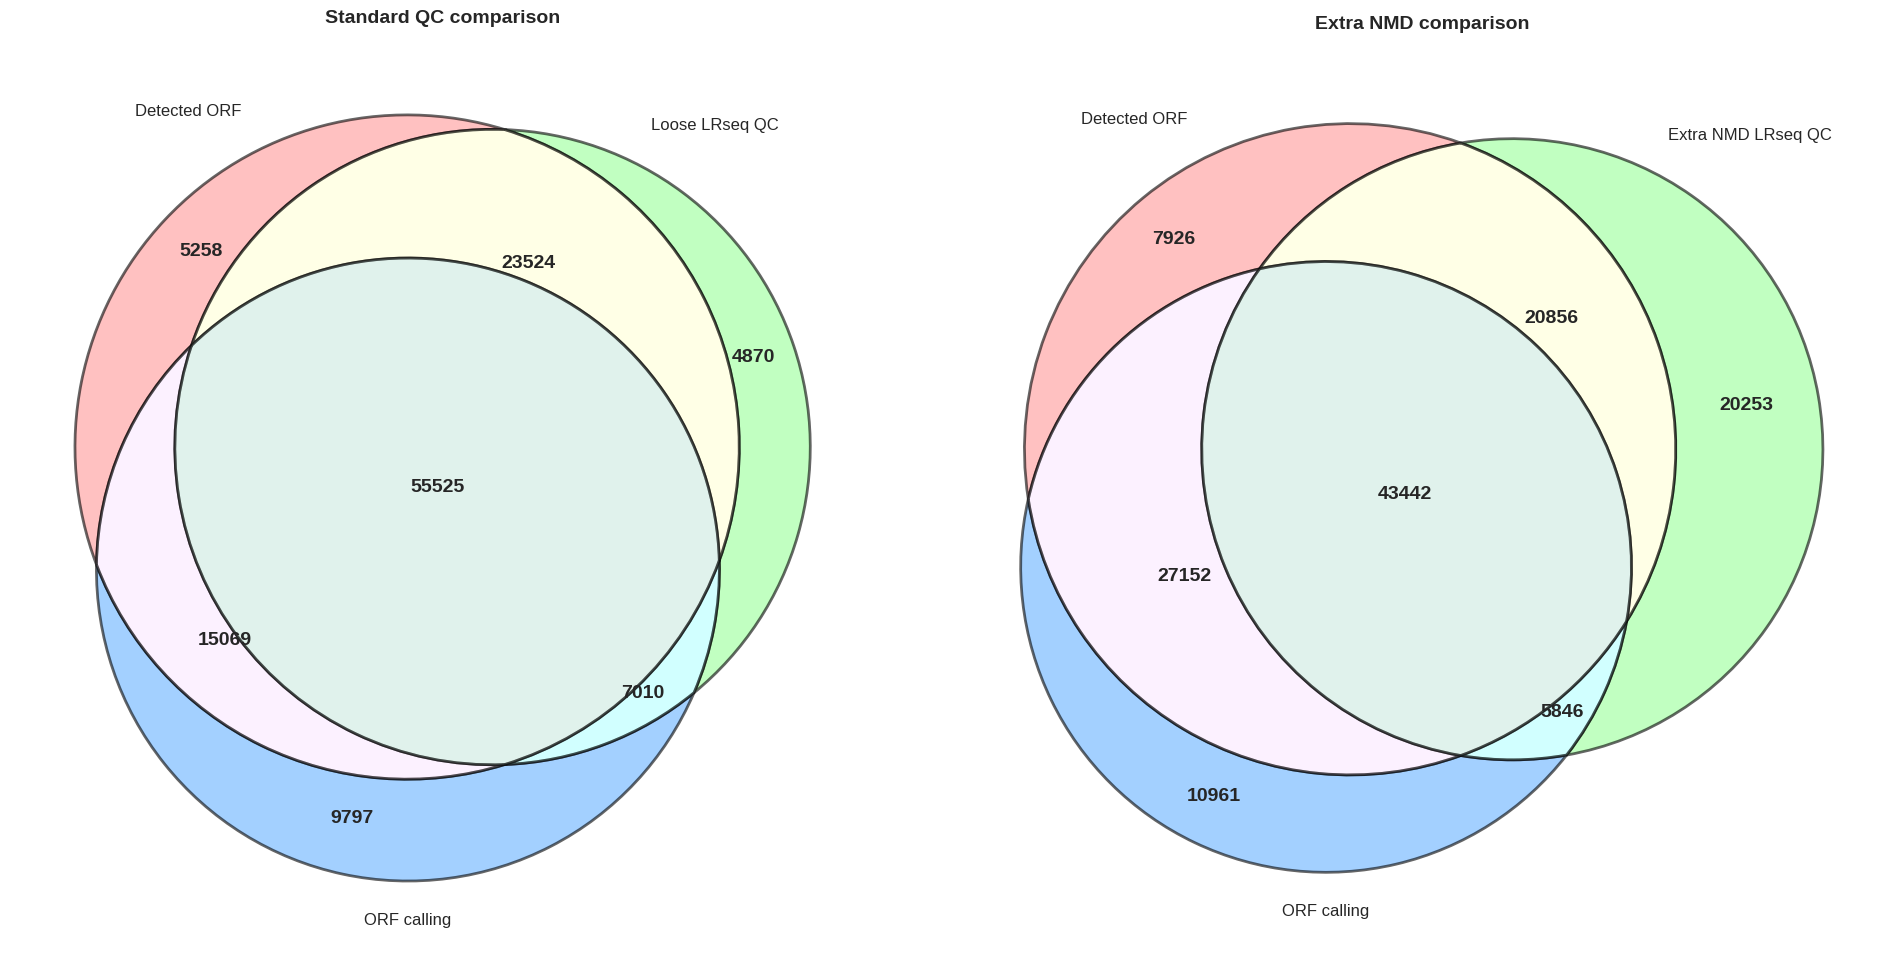

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.colors as mcolors

def read_fasta_ids(fasta_path):
    """Read IDs from FASTA file"""
    ids = set()
    with open(fasta_path, 'r') as f:
        for line in f:
            if line.startswith('>'):
                # Split by tab and take first element, remove '>'
                id_ = line.strip()[1:].split('\t')[0]
                ids.add(id_)
    # Print first few IDs for verification
    print("\nFirst 5 IDs from FASTA file:")
    for id_ in list(ids)[:5]:
        print(id_)
    print(f"Total FASTA IDs: {len(ids)}")
    return ids

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from TSV file"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_triple_venn(set1, set2, set3, labels, ax, colors=None):
    """Create a customized triple Venn diagram"""
    if colors is None:
        colors = ['#FF9999', '#99FF99', '#66B2FF']
    
    # Create Venn diagram
    venn = venn3([set1, set2, set3], 
                 set_labels=labels,
                 ax=ax,
                 set_colors=colors,
                 alpha=0.6)
    
    # Customize appearance
    if venn is not None:
        for patch in venn.patches:
            if patch is not None:
                patch.set_edgecolor('black')
                patch.set_linewidth(2.0)
        
        # Customize text appearance
        for text in venn.set_labels:
            if text is not None:
                text.set_fontsize(12)
        
        for text in venn.subset_labels:
            if text is not None:
                text.set_fontsize(14)
                text.set_fontweight('bold')

def main():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/01_transcriptome_QC/filtering_transcriptome/021.brca_classifcation_QC_sampeCount_loc_symbol_meanPSI_DR_deltaPSI_mane_drug_target_drug_FC_org_func_singleton.tsv"
    file3_path = "04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    file3_ids = read_fasta_ids(file3_path)
    
    # Print set sizes for verification
    print("\nSet sizes:")
    print(f"File1 (Detected ORF): {len(file1_ids)}")
    print(f"File2_1 (Loose QC): {len(file2_ids_1)}")
    print(f"File2_2 (Extra NMD): {len(file2_ids_2)}")
    print(f"File3 (ORF calling): {len(file3_ids)}")
    
    # Print intersection sizes
    print("\ntranscripts count:")
    print(f"File1 ∩ File2_1 ∩ File3: {len(file1_ids & file2_ids_1 & file3_ids)}")
    print(f"File1 ∩ File2_2 ∩ File3: {len(file1_ids & file2_ids_2 & file3_ids)}")
    
    # Create figure
    plt.style.use('seaborn')
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.patch.set_facecolor('white')
    
    # Custom colors
    colors = ['#FF9999', '#99FF99', '#66B2FF']
    
    # Create Venn diagrams
    create_triple_venn(file1_ids, file2_ids_1, file3_ids,
                      ('Detected ORF', 'Loose LRseq QC', 'ORF calling'),
                      axes[0], colors)
    create_triple_venn(file1_ids, file2_ids_2, file3_ids,
                      ('Detected ORF', 'Extra NMD LRseq QC', 'ORF calling'),
                      axes[1], colors)
    
    # Customize titles
    axes[0].set_title('Standard QC comparison', 
                     pad=20, fontsize=14, fontweight='bold')
    axes[1].set_title('Extra NMD comparison', 
                     pad=20, fontsize=14, fontweight='bold')
    
    # Adjust layout and save
    plt.tight_layout(pad=3.0)
    plt.savefig('triple_venn_diagrams.png')
    print("\nVenn diagram saved as 'triple_venn_diagrams.png'")

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def read_fasta_ids(fasta_path):
    """Read IDs from FASTA file"""
    ids = set()
    with open(fasta_path, 'r') as f:
        for line in f:
            if line.startswith('>'):
                id_ = line.strip()[1:].split('\t')[0]
                ids.add(id_)
    return ids

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from TSV file"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids, df
    return set(df[id_column].dropna()), df

def extract_intersection_data():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"
    file3_path = "04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
    
    # Read data
    file1_ids, _ = read_file_ids(file1_path, "transcript_id")
    file2_ids_1, df2_1 = read_file_ids(file2_path_1)
    file2_ids_2, df2_2 = read_file_ids(file2_path_2)
    file3_ids = read_fasta_ids(file3_path)
    
    # Calculate intersections
    intersection_1 = file1_ids & file2_ids_1 & file3_ids
    intersection_2 = file1_ids & file2_ids_2 & file3_ids
    
    # Extract rows from file2_1 and file2_2 that match the intersections
    df2_1_filtered = df2_1[df2_1['isoform_id'].isin(intersection_1)]
    df2_2_filtered = df2_2[df2_2['isoform_id'].isin(intersection_2)]
    
    # Save results
    df2_1_filtered.to_csv('001.standard_QC_intersection.tsv', sep='\t', index=False)
    df2_2_filtered.to_csv('002.extra_NMD_intersection.tsv', sep='\t', index=False)
    
    # Print summary
    print("\nIntersection Summary:")
    print(f"Standard QC intersection (File1 ∩ File2_1 ∩ File3):")
    print(f"- Number of transcripts: {len(intersection_1)}")
    print(f"- Output saved to: intersection_standard_qc.tsv")
    print(f"\nExtra NMD intersection (File1 ∩ File2_2 ∩ File3):")
    print(f"- Number of transcripts: {len(intersection_2)}")
    print(f"- Output saved to: intersection_extra_nmd.tsv")
    
    # Save intersection IDs for reference
    with open('intersection_ids.txt', 'w') as f:
        f.write("Standard QC Intersection IDs:\n")
        f.write("\n".join(sorted(intersection_1)))
        f.write("\n\nExtra NMD Intersection IDs:\n")
        f.write("\n".join(sorted(intersection_2)))
    
    print("\nIntersection IDs saved to: intersection_ids.txt")

if __name__ == "__main__":
    extract_intersection_data()


Intersection Summary:
Standard QC intersection (File1 ∩ File2_1 ∩ File3):
- Number of transcripts: 55525
- Output saved to: intersection_standard_qc.tsv

Extra NMD intersection (File1 ∩ File2_2 ∩ File3):
- Number of transcripts: 43442
- Output saved to: intersection_extra_nmd.tsv

Intersection IDs saved to: intersection_ids.txt
